In [75]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Let's view the datatyps and count to see if we need any preprocessing

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


let's cheak for null values

In [77]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


let's cheak for different catagories in catagorical values and encode them

In [78]:
# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the data type of the column is categorical (object)
    if df[col].dtype == 'object':
        # Print the unique values for the column
        print(f"Unique values for column '{col}': {df[col].unique()}")

Unique values for column 'sex': ['female' 'male']
Unique values for column 'smoker': ['yes' 'no']
Unique values for column 'region': ['southwest' 'southeast' 'northwest' 'northeast']


In [79]:
# Convert 'sex' and 'smoker' columns to binary encoding
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Display the updated DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [80]:
#now let's use a encoder to encode the region column
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'region' column
enc.fit(df[['region']])

# Transform the 'region' column into one-hot encoded features
encoded_sex = enc.transform(df[['region']]).toarray()

# Create a new DataFrame with the one-hot encoded features
encoded_sex_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['region']))

# Concatenate the encoded features with the original DataFrame and drop the old one
df = pd.concat([df, encoded_sex_df], axis=1)
df = df.drop('region', axis=1)

# Display the updated DataFrame
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


#let's Identify all of the outliers for all of the columns

      age  sex    bmi  children  smoker      charges  region_northeast  \
116    58    1  49.06         0       0  11381.32540               0.0   
286    46    0  48.07         2       0   9432.92530               1.0   
401    47    1  47.52         1       0   8083.91980               0.0   
543    54    0  47.41         0       1  63770.42801               0.0   
847    23    1  50.38         1       0   2438.05520               0.0   
...   ...  ...    ...       ...     ...          ...               ...   
1316   19    0  20.60         0       0   1731.67700               0.0   
1329   52    1  38.60         2       0  10325.20600               0.0   
1331   23    0  33.40         0       0  10795.93733               0.0   
1332   52    0  44.70         3       0  11411.68500               0.0   
1336   21    0  25.80         0       0   2007.94500               0.0   

      region_northwest  region_southeast  region_southwest  
116                0.0               1.0          

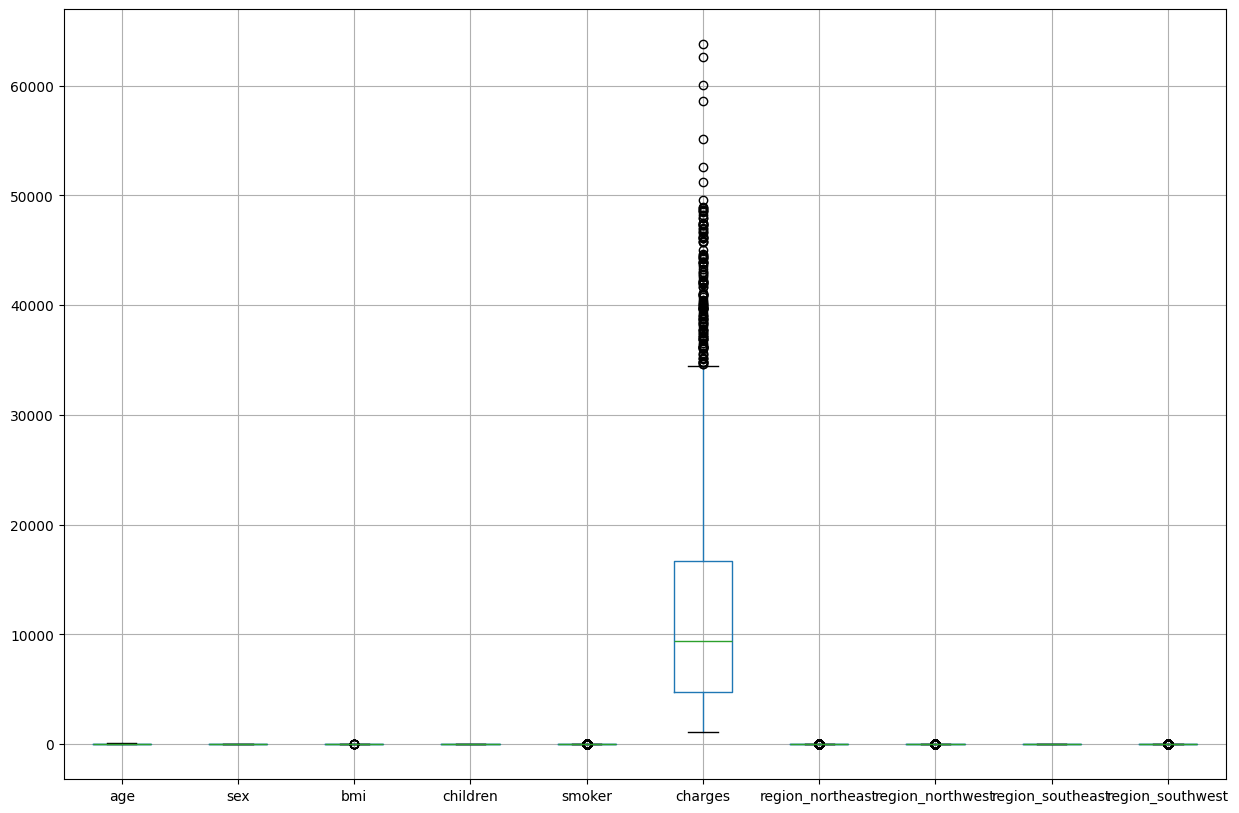

In [81]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed as in the previous code

outlier_df = pd.DataFrame()

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_df = pd.concat([outlier_df, outliers])

# Display the DataFrame containing outliers
print(outlier_df)

# Boxplot visualization (optional)
plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

#We can see that most outliers are in the target features. So let's delete the rows with the outliers

      age  sex    bmi  children  smoker     charges  region_northeast  \
1      18    1  33.77         1       0   1725.5523               0.0   
2      28    1  33.00         3       0   4449.4620               0.0   
5      31    0  25.74         0       0   3756.6216               0.0   
6      46    0  33.44         1       0   8240.5896               0.0   
13     56    0  39.82         0       0  11090.7178               0.0   
...   ...  ...    ...       ...     ...         ...               ...   
1305   24    0  27.72         0       0   2464.6188               0.0   
1322   62    1  38.83         0       0  12981.3457               0.0   
1327   51    1  30.03         1       0   9377.9047               0.0   
1330   57    0  25.74         2       0  12629.1656               0.0   
1335   18    0  36.85         0       0   1629.8335               0.0   

      region_northwest  region_southeast  region_southwest  
1                  0.0               1.0               0.0  
2

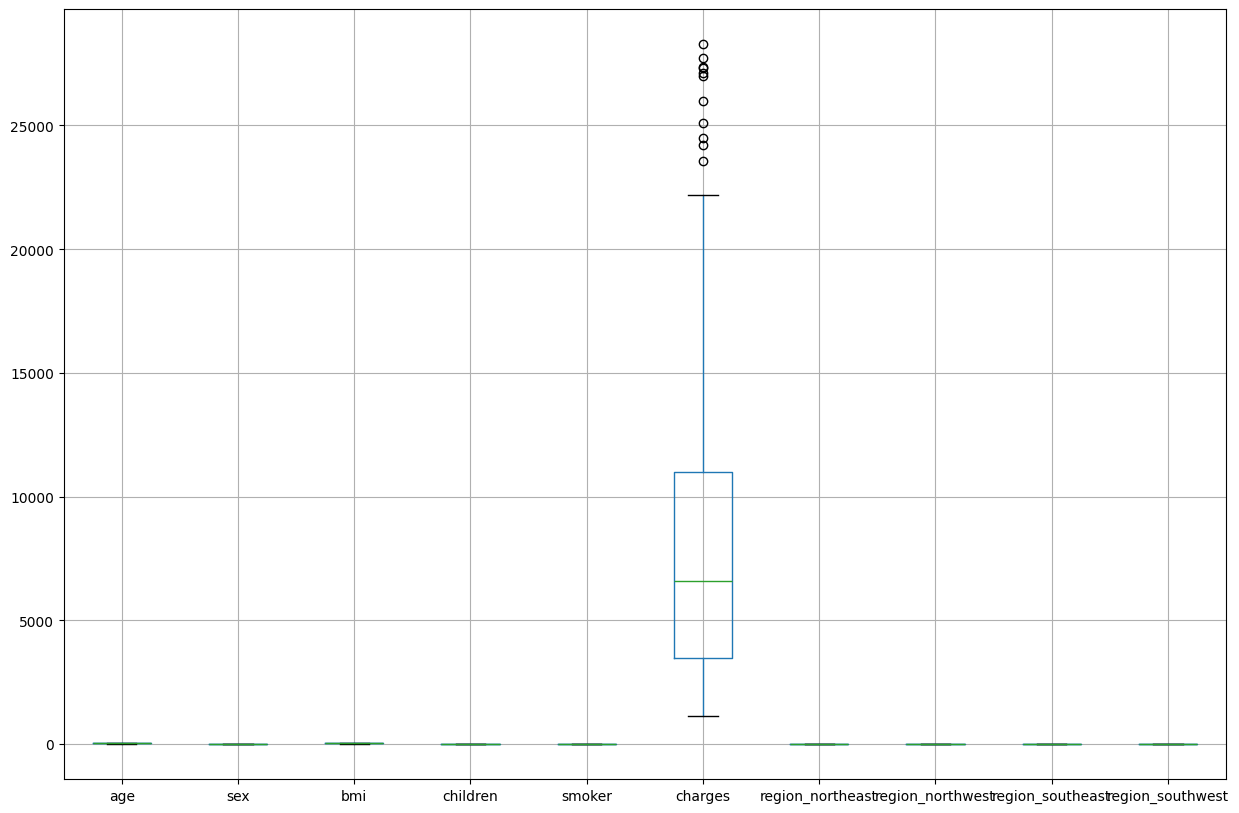

In [82]:
df_no_outliers = df.drop(outlier_df.index)

# Display the DataFrame without outliers
print(df_no_outliers)

# Boxplot visualization of the data without outliers (optional)
plt.figure(figsize=(15, 10))
df_no_outliers.boxplot()
plt.show()

#now lt's see the correlational matrix to select important features we want our model to train upon

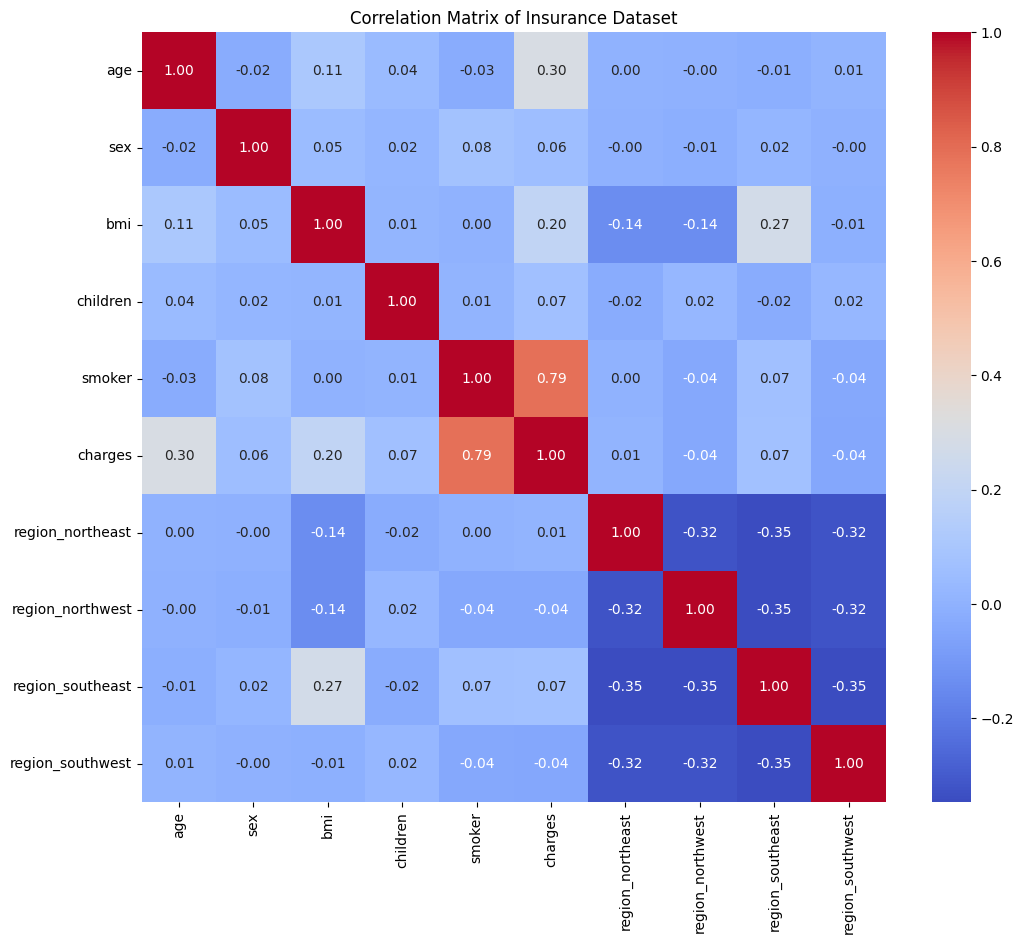

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and preprocessed as in the previous code

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Insurance Dataset')
plt.show()

now based on the co-relation matrix let's take all the input more than 0.1 co-relation with the output feature ('charges')

In [84]:
# Get the correlation with 'charges'
correlation_with_charges = correlation_matrix['charges'].drop('charges')

# Filter columns with correlation greater than 0.1
correlated_columns = correlation_with_charges[abs(correlation_with_charges) > 0.1].index

# Create the new DataFrame with correlated columns and 'charges'
df = df[correlated_columns.tolist() + ['charges']]


we can not train model using raw value as they are in different scale. As a result our model will be biased Thus we need to scale our value. Since we need to scale bmi and age and it dosent make sence for them to have negetive values let's scale them by using MinMaxScaler

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to scale (age and bmi in this case)
columns_to_scale = ['age', 'bmi']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


<ipython-input-85-e9237bdb2406>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7776932310583375


Due to the limited number of columns (input features), the model is unable to capture the underlying patterns effectively. To enhance the model's performance, we need to increase the number of columns. Let's explore the possibility of adding interaction terms between existing features to achieve this. let's view


<ipython-input-87-919a4bca5d98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bmi_interaction'] = df['age'] * df['bmi']
<ipython-input-87-919a4bca5d98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_smoker_interaction'] = df['age'] * df['smoker']
<ipython-input-87-919a4bca5d98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

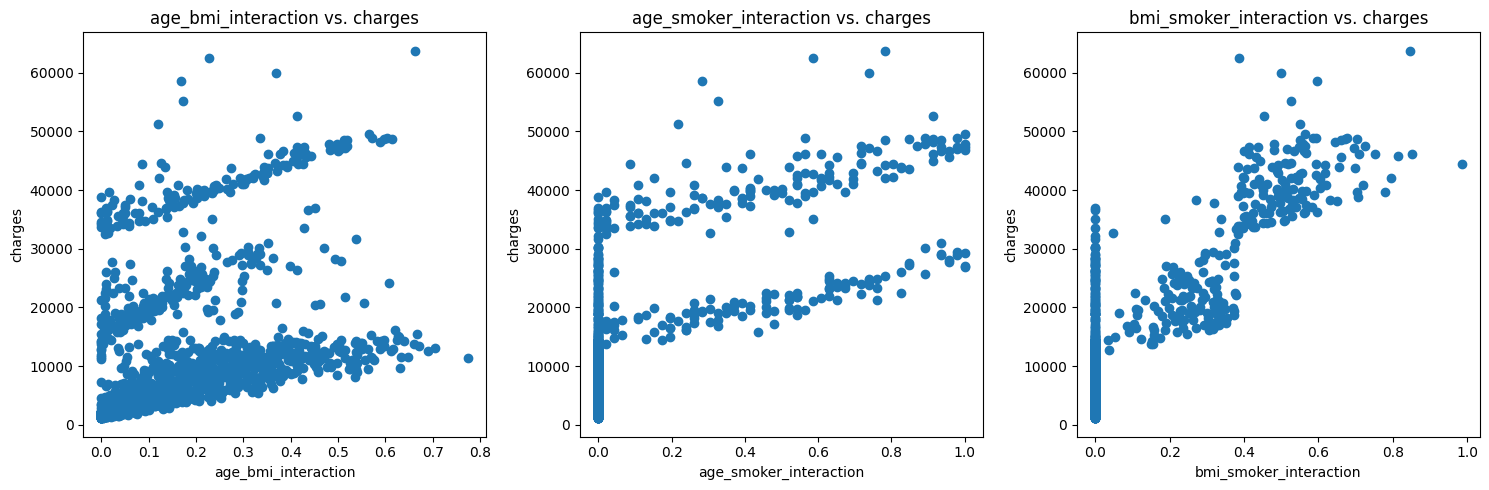

In [87]:
# Create interaction terms
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['age_smoker_interaction'] = df['age'] * df['smoker']
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker']

# List of interaction terms to plot
interaction_terms = ['age_bmi_interaction', 'age_smoker_interaction', 'bmi_smoker_interaction']

# Plot interaction terms against charges
plt.figure(figsize=(15, 5))
for i, term in enumerate(interaction_terms):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[term], df['charges'])
    plt.xlabel(term)
    plt.ylabel('charges')
    plt.title(f'{term} vs. charges')
plt.tight_layout()
plt.show()

from heare we can see that age_bmi age_smoker and bmi_smoker has stron correlation wih charges thus let's include them in training our model

In [88]:
df

,age,bmi,smoker,charges,age_bmi_interaction,age_smoker_interaction,bmi_smoker_interaction
0,0.021739,0.321227,1,16884.92400,0.006983,0.021739,0.321227
1,0.000000,0.479150,0,1725.55230,0.000000,0.000000,0.000000
2,0.217391,0.458434,0,4449.46200,0.099660,0.000000,0.000000
3,0.326087,0.181464,0,21984.47061,0.059173,0.000000,0.000000
4,0.304348,0.347592,0,3866.85520,0.105789,0.000000,0.000000
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0,10600.54830,0.280918,0.000000,0.000000
1334,0.000000,0.429379,0,2205.98080,0.000000,0.000000,0.000000
1335,0.000000,0.562012,0,1629.83350,0.000000,0.000000,0.000000
1336,0.065217,0.264730,0,2007.94500,0.017265,0.000000,0.000000


In [89]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.8593384950146639


let's save the model

In [90]:

import pickle


filename = 'Healt_insurace_charge_model.sav'
pickle.dump(model, open(filename, 'wb'))
#To load the model:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)


In [91]:
from google.colab import files
files.download('Healt_insurace_charge_model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   bmi                     1338 non-null   float64
 2   smoker                  1338 non-null   int64  
 3   charges                 1338 non-null   float64
 4   age_bmi_interaction     1338 non-null   float64
 5   age_smoker_interaction  1338 non-null   float64
 6   bmi_smoker_interaction  1338 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 73.3 KB
